In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from itertools import chain
from prefixspan import PrefixSpan



# SC4020 Project 2 Task 2
---
## 2.1 Preprocessing


### Calculate Z-score

In [3]:
cancerdata = pd.read_csv('Cancer_Data.csv')
cancerdata


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Perform z-score test and Mutual Information ranking
continuous_col = cancerdata.columns.drop(['id','diagnosis'])
continuous_col = [label for label in continuous_col if 'mean' in label]

cancerdata.head()
cancer_sub = cancerdata[continuous_col]
cancer_sub.head()
cancer_sub_zscore = cancer_sub.sub(cancer_sub.mean()).div(cancer_sub.std())
cancer_sub_zscore.head()
cancer_zscore = pd.concat([cancerdata[['id','diagnosis']],cancer_sub_zscore], axis=1)
cancer_zscore.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
1,842517,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
2,84300903,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,84348301,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
4,84358402,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956


In [5]:
# Mutual Information
diagnosis = cancerdata['diagnosis']
mi_scores = mutual_info_classif(cancer_sub,diagnosis , discrete_features=False, random_state=0)
mi_series = pd.Series(mi_scores, index=cancer_sub.columns).sort_values(ascending=False)
importance_series = mi_series.index
print(importance_series)
mi_series

Index(['concave_points_mean', 'perimeter_mean', 'concavity_mean',
       'radius_mean', 'area_mean', 'compactness_mean', 'texture_mean',
       'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


concave_points_mean       0.442473
perimeter_mean            0.404407
concavity_mean            0.375172
radius_mean               0.365652
area_mean                 0.361118
compactness_mean          0.213404
texture_mean              0.096899
smoothness_mean           0.088988
symmetry_mean             0.064931
fractal_dimension_mean    0.007485
dtype: float64

### Convert into discrete features

---
The **number of bins** will have a significant impact on pattern searching, as more bins result in more categories, which may cause the overall support dropping down. Our sensitivity check later below this transforming shows bins=5 is best, but it will make patterns sparser when doing pattern mining. bins=3 will yield good results, so I prepared an encoding/mapping function for bins=3. 

The following code block will have a configuration for the bins, and it will activate different mapping functions.

for bins=5, the categories are:

- highest
- high
- mid
- low
- lowest

for bins=3, the categories are:

- high
- mid
- low


In [6]:
from sklearn.preprocessing import KBinsDiscretizer
cols = cancer_sub_zscore.columns

N_BINS = 5 # ONLY SUPPORTS 3 or 5
assert(N_BINS in [3,5])


def kbins_str_mapping_5(bin_ordinal:int)->str:
    if bin_ordinal == 0:
        return "lowest_"
    elif bin_ordinal == 1:
        return "low_"
    elif bin_ordinal == 2:
        return "mid_"
    elif bin_ordinal == 3:
        return "high_"
    elif bin_ordinal == 4:
        return "highest_"


def kbins_str_mapping_3(bin_ordinal:int)->str:
    if bin_ordinal == 0:
        return "low_"
    elif bin_ordinal == 1:
        return "mid_"
    elif bin_ordinal == 2:
        return "high_"
# ---- 2) KBins 在 z-score 上离散化，并包回 DataFrame ----
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
kbins_str_mapping = kbins_str_mapping_5 if N_BINS == 5 else kbins_str_mapping_3


kbins.fit(cancer_sub_zscore[cols].values)  # 也可直接 fit DataFrame

cancer_sub_zscore_discrete = pd.DataFrame(
    kbins.transform(cancer_sub_zscore[cols].values),
    index=cancer_sub_zscore.index,
    columns=cols
).astype(int)   # 0/1/2

# ---- 3) 为每位病人按 |z| 排序（与 cols 对齐）----
feature_seqs = []
for i in range(cancer_sub_zscore.shape[0]):
    r = cancer_sub_zscore.iloc[i]           # 只用子集列
    r = r.abs().sort_values(ascending=False)
    feature_seqs.append(r.index.tolist())

feature_seqs = pd.DataFrame(feature_seqs, index=cancer_sub_zscore.index)
feature_seqs.head()


,0,1,2,3,4,5,6,7,8,9
0,compactness_mean,concavity_mean,concave_points_mean,fractal_dimension_mean,symmetry_mean,texture_mean,smoothness_mean,perimeter_mean,radius_mean,area_mean
1,area_mean,radius_mean,perimeter_mean,fractal_dimension_mean,smoothness_mean,concave_points_mean,compactness_mean,texture_mean,concavity_mean,symmetry_mean
2,concave_points_mean,radius_mean,perimeter_mean,area_mean,concavity_mean,compactness_mean,smoothness_mean,symmetry_mean,texture_mean,fractal_dimension_mean
3,fractal_dimension_mean,compactness_mean,smoothness_mean,symmetry_mean,concavity_mean,concave_points_mean,radius_mean,area_mean,perimeter_mean,texture_mean
4,area_mean,perimeter_mean,radius_mean,concave_points_mean,concavity_mean,texture_mean,fractal_dimension_mean,compactness_mean,smoothness_mean,symmetry_mean


### Sensitivity Check for KBins

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_selection import mutual_info_classif
from itertools import product

X = cancer_sub_zscore.copy()
y = (diagnosis == 'M').astype(int).values  # 转为0/1

param_grid = {
    "n_bins": [3, 4, 5],
    "strategy": ["quantile", "uniform", "kmeans"]
}

results = []
disc_maps = {}  # 保存每组参数的离散化结果 DataFrame

for n_bins, strategy in product(param_grid["n_bins"], param_grid["strategy"]):
    enc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    Xt = enc.fit_transform(X.values)      # ndarray
    Xt = pd.DataFrame(Xt, index=X.index, columns=X.columns).astype(int)

    # 1) 与标签的互信息（逐列 MI，取均值/中位数做整体指标）
    # mutual_info_classif 需要二维输入；对每列单独算
    mi_each = []
    for col in Xt.columns:
        mi = mutual_info_classif(Xt[[col]].values, y, discrete_features=True, random_state=0)
        mi_each.append(mi[0])
    mi_mean = float(np.mean(mi_each))
    mi_median = float(np.median(mi_each))

    # 2) 记录
    key = f"bins={n_bins}|{strategy}"
    disc_maps[key] = Xt
    results.append({
        "setting": key,
        "n_bins": n_bins,
        "strategy": strategy,
        "mi_mean": mi_mean,
        "mi_median": mi_median
    })

df_kbins_score = pd.DataFrame(results).sort_values(["mi_mean","mi_median"], ascending=False)
df_kbins_score

,setting,n_bins,strategy,mi_mean,mi_median
6,bins=5|quantile,5,quantile,0.231619,0.277891
8,bins=5|kmeans,5,kmeans,0.218796,0.259932
3,bins=4|quantile,4,quantile,0.218210,0.261332
5,bins=4|kmeans,4,kmeans,0.211522,0.254099
0,bins=3|quantile,3,quantile,0.208847,0.252918
7,bins=5|uniform,5,uniform,0.208168,0.247533
2,bins=3|kmeans,3,kmeans,0.202783,0.234031
4,bins=4|uniform,4,uniform,0.194791,0.235051
1,bins=3|uniform,3,uniform,0.166419,0.178512


In [8]:
pairs = []
keys = list(disc_maps.keys())
for i in range(len(keys)):
    for j in range(i+1, len(keys)):
        k1, k2 = keys[i], keys[j]
        Xt1, Xt2 = disc_maps[k1], disc_maps[k2]

        # 逐列 ARI
        ari_cols = []
        for col in X.columns:
            ari = adjusted_rand_score(Xt1[col].values, Xt2[col].values)
            ari_cols.append(ari)
        pairs.append({
            "setting_a": k1,
            "setting_b": k2,
            "ARI_mean": float(np.mean(ari_cols)),
            "ARI_median": float(np.median(ari_cols))
        })

df_stability = pd.DataFrame(pairs).sort_values(["ARI_mean","ARI_median"], ascending=False)
df_stability


,setting_a,setting_b,ARI_mean,ARI_median
16,bins=3|kmeans,bins=4|uniform,0.690543,0.689108
32,bins=4|kmeans,bins=5|kmeans,0.611878,0.511678
31,bins=4|kmeans,bins=5|uniform,0.606523,0.603877
25,bins=4|quantile,bins=5|kmeans,0.580616,0.588666
4,bins=3|quantile,bins=4|kmeans,0.574514,0.571703
23,bins=4|quantile,bins=5|quantile,0.570296,0.569860
35,bins=5|uniform,bins=5|kmeans,0.566442,0.509892
17,bins=3|kmeans,bins=4|kmeans,0.562102,0.534142
26,bins=4|uniform,bins=4|kmeans,0.532872,0.535519
2,bins=3|quantile,bins=4|quantile,0.532168,0.531843


### Sensitivity Result

Based on research of sensitivity result, the bin method with highest MI and highest mean ARI w.r.t. other bin methods is our top pick.

Thus we selected `bins=5,strategy='quantile'` as our bin method.

### Generate sequence for each patient and split into bins of features

In [9]:
feature_rank_seqs = []
for i in range(feature_seqs.shape[0]):
    row_tokens = []
    r = feature_seqs.iloc[i]
    for j in range(r.shape[0]):
        feat = r[j]  # 特征名
        binv = cancer_sub_zscore_discrete.loc[feature_seqs.index[i], feat]
        base = feat.removesuffix("_mean")
        row_tokens.append(kbins_str_mapping(binv) + base)
    feature_rank_seqs.append(row_tokens)

feature_rank_seqs = pd.DataFrame(feature_rank_seqs, index=cancer_sub_zscore.index)

# 如需把全部 token 拉平成 list：
flat_tokens = feature_rank_seqs.stack().tolist()

feature_rank_seqs.head()

,0,1,2,3,4,5,6,7,8,9
0,highest_compactness,highest_concavity,highest_concave_points,highest_fractal_dimension,highest_symmetry,lowest_texture,highest_smoothness,highest_perimeter,highest_radius,highest_area
1,highest_area,highest_radius,highest_perimeter,lowest_fractal_dimension,low_smoothness,high_concave_points,low_compactness,low_texture,high_concavity,mid_symmetry
2,highest_concave_points,highest_radius,highest_perimeter,highest_area,highest_concavity,highest_compactness,highest_smoothness,highest_symmetry,high_texture,low_fractal_dimension
3,highest_fractal_dimension,highest_compactness,highest_smoothness,highest_symmetry,highest_concavity,highest_concave_points,low_radius,lowest_area,low_perimeter,high_texture
4,highest_area,highest_perimeter,highest_radius,highest_concave_points,highest_concavity,lowest_texture,low_fractal_dimension,high_compactness,high_smoothness,mid_symmetry


### Pattern Mining

#### Encode: Encode features to int ( in favour of computation in prefixspan)

In [10]:
feature_rank_seqs

,0,1,2,3,4,5,6,7,8,9
0,highest_compactness,highest_concavity,highest_concave_points,highest_fractal_dimension,highest_symmetry,lowest_texture,highest_smoothness,highest_perimeter,highest_radius,highest_area
1,highest_area,highest_radius,highest_perimeter,lowest_fractal_dimension,low_smoothness,high_concave_points,low_compactness,low_texture,high_concavity,mid_symmetry
2,highest_concave_points,highest_radius,highest_perimeter,highest_area,highest_concavity,highest_compactness,highest_smoothness,highest_symmetry,high_texture,low_fractal_dimension
3,highest_fractal_dimension,highest_compactness,highest_smoothness,highest_symmetry,highest_concavity,highest_concave_points,low_radius,lowest_area,low_perimeter,high_texture
4,highest_area,highest_perimeter,highest_radius,highest_concave_points,highest_concavity,lowest_texture,low_fractal_dimension,high_compactness,high_smoothness,mid_symmetry
...,...,...,...,...,...,...,...,...,...,...
564,highest_area,highest_concave_points,highest_radius,highest_perimeter,highest_concavity,highest_smoothness,lowest_fractal_dimension,high_texture,mid_symmetry,high_compactness
565,highest_texture,highest_area,highest_radius,highest_perimeter,highest_concave_points,lowest_fractal_dimension,high_concavity,mid_symmetry,mid_smoothness,mid_compactness
566,highest_texture,lowest_fractal_dimension,low_smoothness,low_symmetry,high_radius,high_perimeter,high_area,high_concave_points,high_concavity,mid_compactness
567,highest_concavity,highest_compactness,highest_concave_points,highest_texture,highest_symmetry,highest_perimeter,highest_radius,highest_area,highest_smoothness,highest_fractal_dimension


In [11]:
all_items = set(feature_rank_seqs.stack(-1).tolist())
# setup two projection dictionary (Encoder/Decoder)
item2id = { item: i for i, item in enumerate(all_items, start=1)}
id2item = {i : item for item, i in item2id.items()}

seq_in_int = [[ item2id[feature_rank_seqs.iloc[i][j]] for j in range(0,feature_seqs.shape[1])] for i in range(0,feature_seqs.shape[0])]


seq_in_int

[[14, 21, 26, 10, 1, 39, 11, 49, 31, 41],
 [41, 31, 49, 45, 20, 4, 23, 24, 36, 50],
 [26, 31, 49, 41, 21, 14, 11, 1, 40, 16],
 [10, 14, 11, 1, 21, 26, 18, 42, 2, 40],
 [41, 49, 31, 26, 21, 39, 16, 43, 27, 50],
 [11, 10, 14, 1, 21, 24, 4, 30, 18, 13],
 [31, 49, 41, 16, 4, 36, 40, 5, 43, 50],
 [10, 11, 1, 14, 40, 4, 6, 7, 13, 36],
 [11, 1, 14, 10, 21, 26, 40, 6, 7, 13],
 [10, 14, 21, 11, 37, 26, 1, 30, 18, 13],
 [28, 33, 37, 16, 23, 15, 34, 46, 8, 9],
 [46, 43, 34, 4, 8, 24, 12, 36, 50, 5],
 [14, 10, 1, 49, 26, 21, 31, 41, 37, 5],
 [45, 37, 33, 34, 46, 8, 36, 50, 4, 19],
 [14, 10, 21, 11, 1, 4, 37, 6, 7, 46],
 [37, 1, 11, 10, 14, 21, 4, 46, 34, 8],
 [28, 23, 16, 40, 25, 5, 34, 46, 4, 8],
 [14, 10, 11, 26, 1, 21, 46, 34, 8, 40],
 [41, 31, 49, 45, 26, 28, 36, 40, 5, 19],
 [39, 16, 19, 25, 48, 6, 13, 7, 5, 9],
 [24, 11, 10, 48, 25, 9, 43, 6, 7, 13],
 [39, 17, 44, 42, 10, 23, 15, 47, 27, 50],
 [1, 14, 21, 26, 39, 10, 27, 46, 34, 8],
 [41, 31, 49, 45, 26, 37, 36, 50, 5, 19],
 [11, 26, 21, 14,

#### Split by label

In [12]:
malignant_index = diagnosis.index[diagnosis == 'M']
benign_index = diagnosis.index[diagnosis == 'B']
malignant_index.tolist()
malignant_seq = [seq_in_int[i] for i in malignant_index]
benign_seq = [seq_in_int[i] for i in benign_index]

print(len(malignant_seq), len(benign_seq))

212 357


#### mining patterns, save to csv file

In [44]:
MIN_SUP = 0.1
min_cnt = int(np.ceil(MIN_SUP * len(malignant_seq)))



psm = PrefixSpan(malignant_seq)
freq = psm.frequent(min_cnt)  # [(support_count, pattern), pattern是子序列(list[int])]

# 按支持度、长度排序并打印前20条
freq = sorted(freq, key=lambda x: (x[0], len(x[1])), reverse=True)[:]
N = len(malignant_seq)
freq_list = []
print("-------------- Malignant -------------\n")
for sup, pat in freq:
    pattern_str = [ id2item[index] for index in pat]
    freq_list.append([sup, sup/N, pattern_str])
    print(f"support={sup}/{N}={sup/N:.2f}  pattern={pattern_str}")

malignant_patterns = pd.DataFrame(freq_list)
malignant_patterns.columns = ['Occurrence', 'Support', 'Pattern']
malignant_patterns.to_csv('malignant_patterns.csv')

print("\n\n\n-------------- Benign -------------\n")

min_cnt = int(np.ceil(MIN_SUP * len(benign_seq)))
psb = PrefixSpan(benign_seq)
freq = psb.frequent(min_cnt)
freq = sorted(freq, key=lambda x: (x[0], len(x[1])), reverse=True)[:]
N = len(benign_seq)
freq_list = []
for sup, pat in freq:
    pattern_str = [ id2item[index] for index in pat]
    freq_list.append([sup, sup/N, pattern_str])
    print(f"support={sup}/{N}={sup/N:.2f}  pattern={pattern_str}")
benign_patterns = pd.DataFrame(freq_list)
benign_patterns.columns = ['Occurrence', 'Support', 'Pattern']    
benign_patterns.to_csv('benign_patterns.csv')

-------------- Malignant -------------

support=113/212=0.53  pattern=['highest_concave_points']
support=113/212=0.53  pattern=['highest_perimeter']
support=113/212=0.53  pattern=['highest_radius']
support=113/212=0.53  pattern=['highest_area']
support=107/212=0.50  pattern=['highest_concavity']
support=97/212=0.46  pattern=['highest_compactness']
support=81/212=0.38  pattern=['high_concave_points']
support=79/212=0.37  pattern=['high_concavity']
support=74/212=0.35  pattern=['highest_texture']
support=71/212=0.33  pattern=['high_texture']
support=71/212=0.33  pattern=['high_perimeter']
support=70/212=0.33  pattern=['highest_radius', 'highest_area']
support=70/212=0.33  pattern=['highest_symmetry']
support=70/212=0.33  pattern=['highest_smoothness']
support=67/212=0.32  pattern=['high_radius']
support=67/212=0.32  pattern=['high_area']
support=66/212=0.31  pattern=['highest_radius', 'highest_perimeter']
support=64/212=0.30  pattern=['high_compactness']
support=62/212=0.29  pattern=['hi

## Analysis
### Difference Analysis
By measuring difference between patterns in supports within malignant and benign cases, we can identify those patterns which contributes most to their diagnosis.

In [45]:
malignant = pd.read_csv('malignant_patterns.csv')
benign = pd.read_csv('benign_patterns.csv')
malignant = malignant.rename(columns={'Support':'msupport'})
benign = benign.rename(columns={'Support':'bsupport'})

    

In [46]:
malignant_diff = pd.merge(malignant[['Pattern', 'msupport']],
                          benign[['Pattern','bsupport']],
                          on='Pattern', how="left")
malignant_diff = malignant_diff.fillna(0)
malignant_diff['delta'] = malignant_diff['msupport'] - malignant_diff['bsupport']
malignant_diff = malignant_diff.sort_values(['delta'], ascending=False)
malignant_diff



,Pattern,msupport,bsupport,delta
0,['highest_concave_points'],0.533019,0.000000,0.533019
1,['highest_perimeter'],0.533019,0.000000,0.533019
2,['highest_radius'],0.533019,0.000000,0.533019
3,['highest_area'],0.533019,0.000000,0.533019
4,['highest_concavity'],0.504717,0.000000,0.504717
...,...,...,...,...
187,"['mid_area', 'mid_radius']",0.103774,0.246499,-0.142725
175,['mid_area'],0.108491,0.252101,-0.143610
174,['low_texture'],0.108491,0.254902,-0.146411
190,['low_symmetry'],0.103774,0.252101,-0.148327


In [48]:
benign_diff = pd.merge(malignant[['Pattern', 'msupport']],
                       benign[['Pattern','bsupport']],
                       on='Pattern', how="right")
benign_diff = benign_diff.fillna(0)
benign_diff['delta'] = benign_diff['bsupport'] - benign_diff['msupport']
benign_diff = benign_diff.sort_values(['delta'], ascending=False).loc[benign_diff['delta'] > 0.2]
benign_diff

,Pattern,msupport,bsupport,delta
0,['lowest_concave_points'],0.0,0.319328,0.319328
1,['lowest_perimeter'],0.0,0.316527,0.316527
2,['lowest_concavity'],0.0,0.316527,0.316527
3,['lowest_radius'],0.0,0.313725,0.313725
4,['lowest_area'],0.0,0.310924,0.310924
5,"['lowest_radius', 'lowest_area']",0.0,0.308123,0.308123
6,['low_concave_points'],0.0,0.308123,0.308123
7,['low_concavity'],0.0,0.302521,0.302521
8,['lowest_compactness'],0.0,0.302521,0.302521
9,['low_area'],0.0,0.302521,0.302521


Above shows the most contributing patterns.

---


###

C:\Users\Yukun\AppData\Local\Temp\ipykernel_31040\3586585573.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, y="Pattern", x="delta", palette="coolwarm")


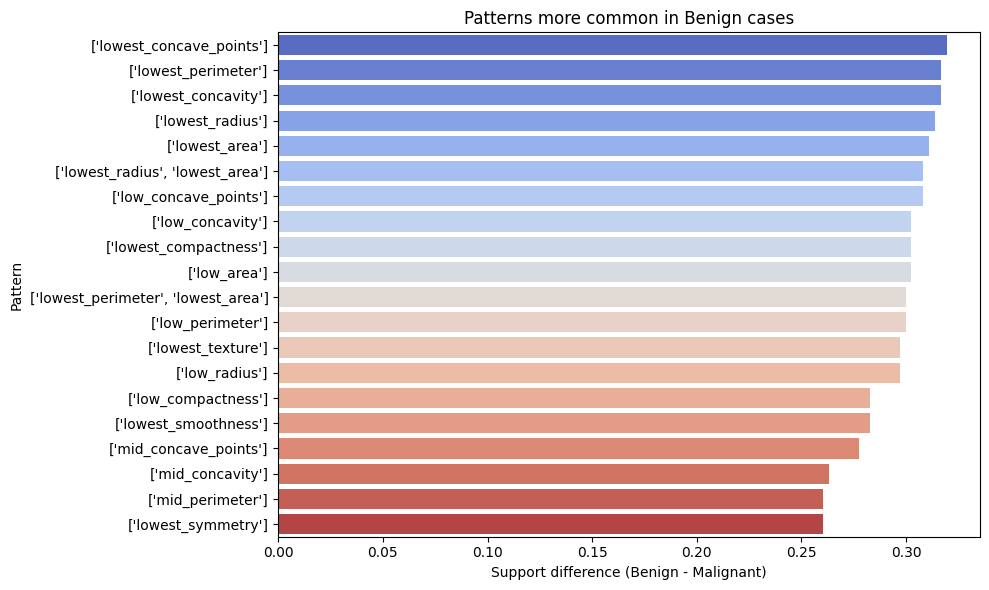

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选前20个差异最大的模式
top = benign_diff.sort_values("delta", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top, y="Pattern", x="delta", palette="coolwarm")
plt.xlabel("Support difference (Benign - Malignant)")
plt.ylabel("Pattern")
plt.title("Patterns more common in Benign cases")
plt.tight_layout()
plt.show()


C:\Users\Yukun\AppData\Local\Temp\ipykernel_31040\716467004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, y="Pattern", x="delta", palette="coolwarm")


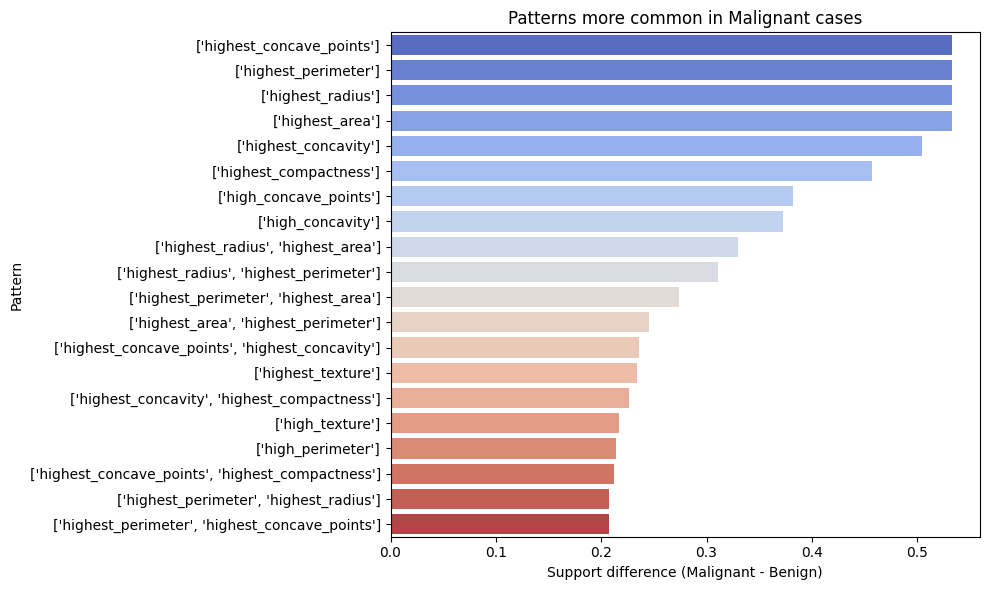

In [53]:
top = malignant_diff.sort_values("delta", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top, y="Pattern", x="delta", palette="coolwarm")
plt.xlabel("Support difference (Malignant - Benign)")
plt.ylabel("Pattern")
plt.title("Patterns more common in Malignant cases")
plt.tight_layout()
plt.show()


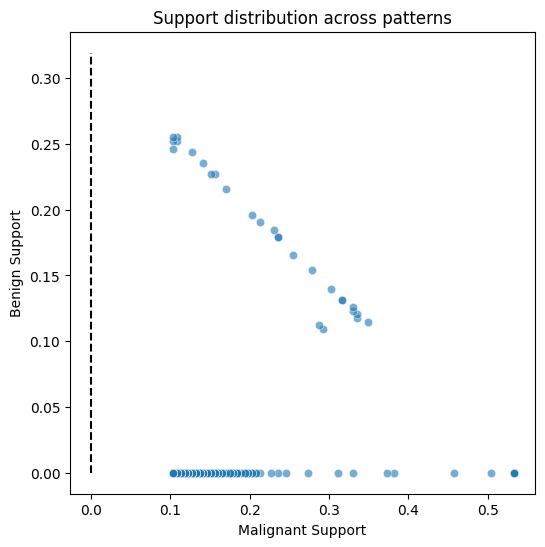

In [52]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=malignant_diff, x="msupport", y="bsupport", alpha=0.6)

# 对角线表示支持度相等
plt.plot([0, max(benign_diff['msupport'])], [0, max(benign_diff['bsupport'])], 'k--')

plt.xlabel("Malignant Support")
plt.ylabel("Benign Support")
plt.title("Support distribution across patterns")
plt.show()


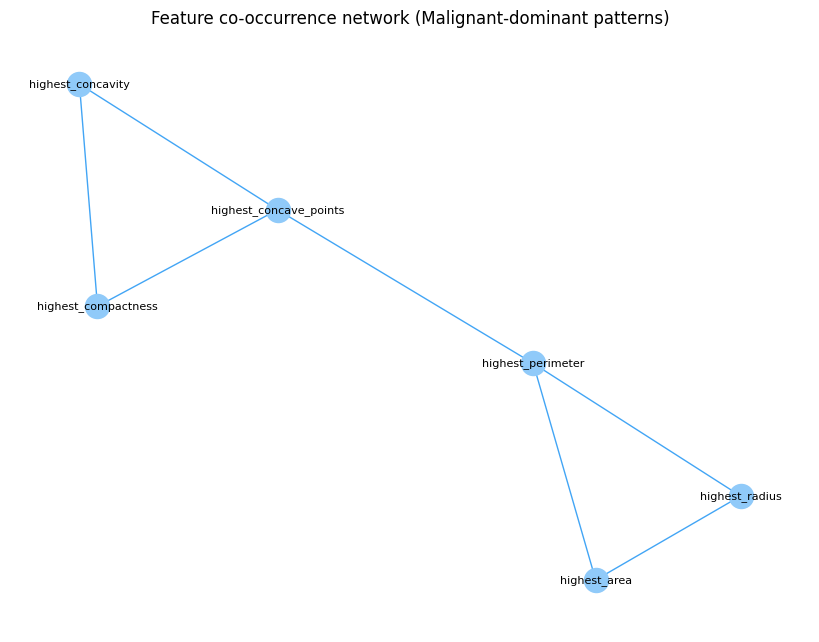

In [56]:
import networkx as nx

# 从 top20 模式提取特征连接
top = malignant_diff.sort_values("delta", ascending=False).head(20)
G = nx.Graph()

for _, row in top.iterrows():
    items = row["Pattern"].strip("[]").replace("'", "").split(", ")
    for i in range(len(items)-1):
        G.add_edge(items[i], items[i+1], weight=row["delta"])

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="#90CAF9", edge_color="#42A5F5", font_size=8)
plt.title("Feature co-occurrence network (Malignant-dominant patterns)")
plt.show()